In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [2]:
test_accs_all = []
ckpts = ["1666", "3332", "4998", "6664", "8330", "9996", "11662", "13328", "14994", "16660"]
for ckpt in ckpts:
    test_accs = (np.load("ckpts/math_aug3_total20000_epochs20/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all.append(test_accs.mean())

test_accs_all = np.array(test_accs_all)

0.12156
0.17268
0.1888
0.21468
0.23652
0.2436
0.2592
0.2652
0.27464
0.28064


In [55]:
# test_accs_all = []
# ckpts = ["832", "1664", "2496", "3328", "4160", "4992", "5824", "6656", "7488", "8320"]
# for ckpt in ckpts:
#     test_accs = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
#     print(test_accs.mean())
#     # test_accs_all.append(test_accs.mean())
#     test_accs_all.append(test_accs.mean())


# test_accs_all = np.array(test_accs_all)

In [56]:
# test_accs_all = []
# ckpts = ["832", "1664", "2496", "3328", "4160", "4992", "5824", "6656", "7488", "8320"]
# for ckpt in ckpts:
#     test_accs = (np.load("ckpts/math_aug3_unmemorized_leq_3_total10000_epochs20/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
#     print(test_accs.mean())
#     # test_accs_all.append(test_accs.mean())
#     test_accs_all.append(test_accs.mean())


# test_accs_all = np.array(test_accs_all)

In [2]:
with open('data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [3]:
subsample_idxs = np.load("ckpts/math_aug3_total20000_epochs20/subsample_idxs.npy")

In [5]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

ckpts = ["1666", "3332", "4998", "6664", "8330", "9996", "11662", "13328", "14994", "16660"]
# ckpts = ["3332", "6664", "9996", "13328", "16660"]

for ckpt in ckpts:
    train_correct = (np.load("ckpts/math_aug3_total20000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/math_aug3_total20000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

In [13]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

# ckpts = ["1666", "3332", "4998", "6664", "8330", "9996", "11662", "13328", "14994", "16660"]
ckpts = ["3332", "6664", "9996", "13328"]

for ckpt in ckpts:
    train_correct = (np.load("ckpts/math_aug3_total20000_epochs20/checkpoint-"+ckpt+ "/train_aug_answer_types4_seed2.npy")==0)
    train_samples = (np.load("ckpts/math_aug3_total20000_epochs20/checkpoint-"+ckpt+ "/train_aug_answers4_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(4):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)


train_correct = []
train_samples = []
for seed in [0, 1, 2, 3]:
    train_correct_seed = (np.load("ckpts/math_aug3_total20000_epochs20"+ f"/train_aug_answer_types1_seed{seed}.npy")==0)
    train_samples_seed = (np.load("ckpts/math_aug3_total20000_epochs20"+ f"/train_aug_answers1_seed{seed}.npy"))
    train_correct.append(train_correct_seed)
    train_samples.append(train_samples_seed)

train_correct = np.swapaxes(train_correct, 1, 0, ).squeeze()
train_samples = np.swapaxes(train_samples, 1, 0, ).squeeze()

num_memorized_ckpt = []
num_correct_different_ckpt = []
num_incorrect_ckpt = []

for input_idx in range(len(train_correct)):
    num_memorized = 0
    num_correct_different = 0
    num_incorrect = 0
    for sample_idx in range(4):
        correct = train_correct[input_idx, sample_idx]
        if correct:
            if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                num_memorized+=1
            else:
                num_correct_different+=1
        else:
            num_incorrect+=1 
    num_memorized_ckpt.append(num_memorized)
    num_correct_different_ckpt.append(num_correct_different)
    num_incorrect_ckpt.append(num_incorrect)

num_memorized_all.append(num_memorized_ckpt)
num_correct_different_all.append(num_correct_different_ckpt)
num_incorrect_all.append(num_incorrect_ckpt)    


num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

In [22]:
num_correct_different_all

array([[0, 1, 0, ..., 0, 1, 4],
       [0, 1, 0, ..., 0, 0, 4],
       [0, 2, 0, ..., 0, 1, 4],
       [0, 1, 0, ..., 0, 0, 4],
       [0, 1, 1, ..., 0, 0, 4]])

In [32]:
len( np.where(num_correct_different_all.max(axis=0)==4)[0])

6691

In [37]:
np.save("ckpts/math_aug3_total20000_epochs20/subsample_idxs_max_unmemorized==4.npy", subsample_idxs[np.where(num_correct_different_all.max(axis=0)==4)[0]])

In [38]:
np.load("ckpts/math_aug3_total20000_epochs20/subsample_idxs_max_unmemorized==0.npy") == subsample_idxs[np.where(num_correct_different_all.max(axis=0)==0)[0]]

array([ True,  True,  True, ...,  True,  True,  True])

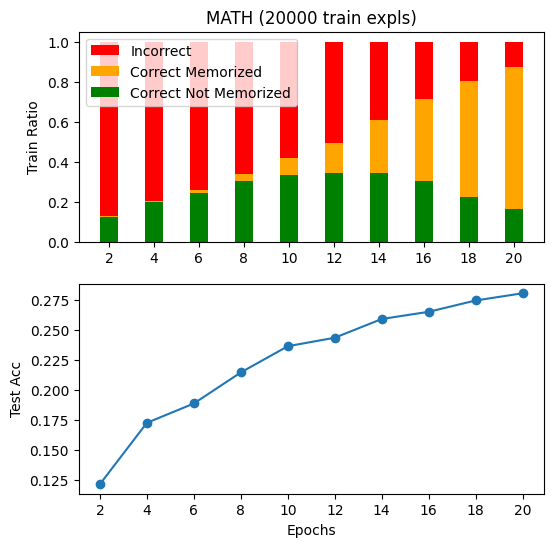

In [24]:
# make 2 subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.bar([2*i for i in range(1, 11)], [1 for i in range(10)], color = "red", label = "Incorrect")
ax1.bar([2*i for i in range(1, 11)], [1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(10)], color = "orange", label = "Correct Memorized")
ax1.bar([2*i for i in range(1, 11)], [1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(10)], color = "green", label = "Correct Not Memorized")
ax1.set_xticks([2*i for i in range(1, 11)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (20000 train expls)")
ax1.legend()

ax2.plot([2*i for i in range(1, 11)], test_accs_all, "o-")
ax2.set_xticks([2*i for i in range(1, 11)])
ax2.set_ylabel("Test Acc")
ax2.set_xlabel("Epochs")
plt.savefig("delete.png")

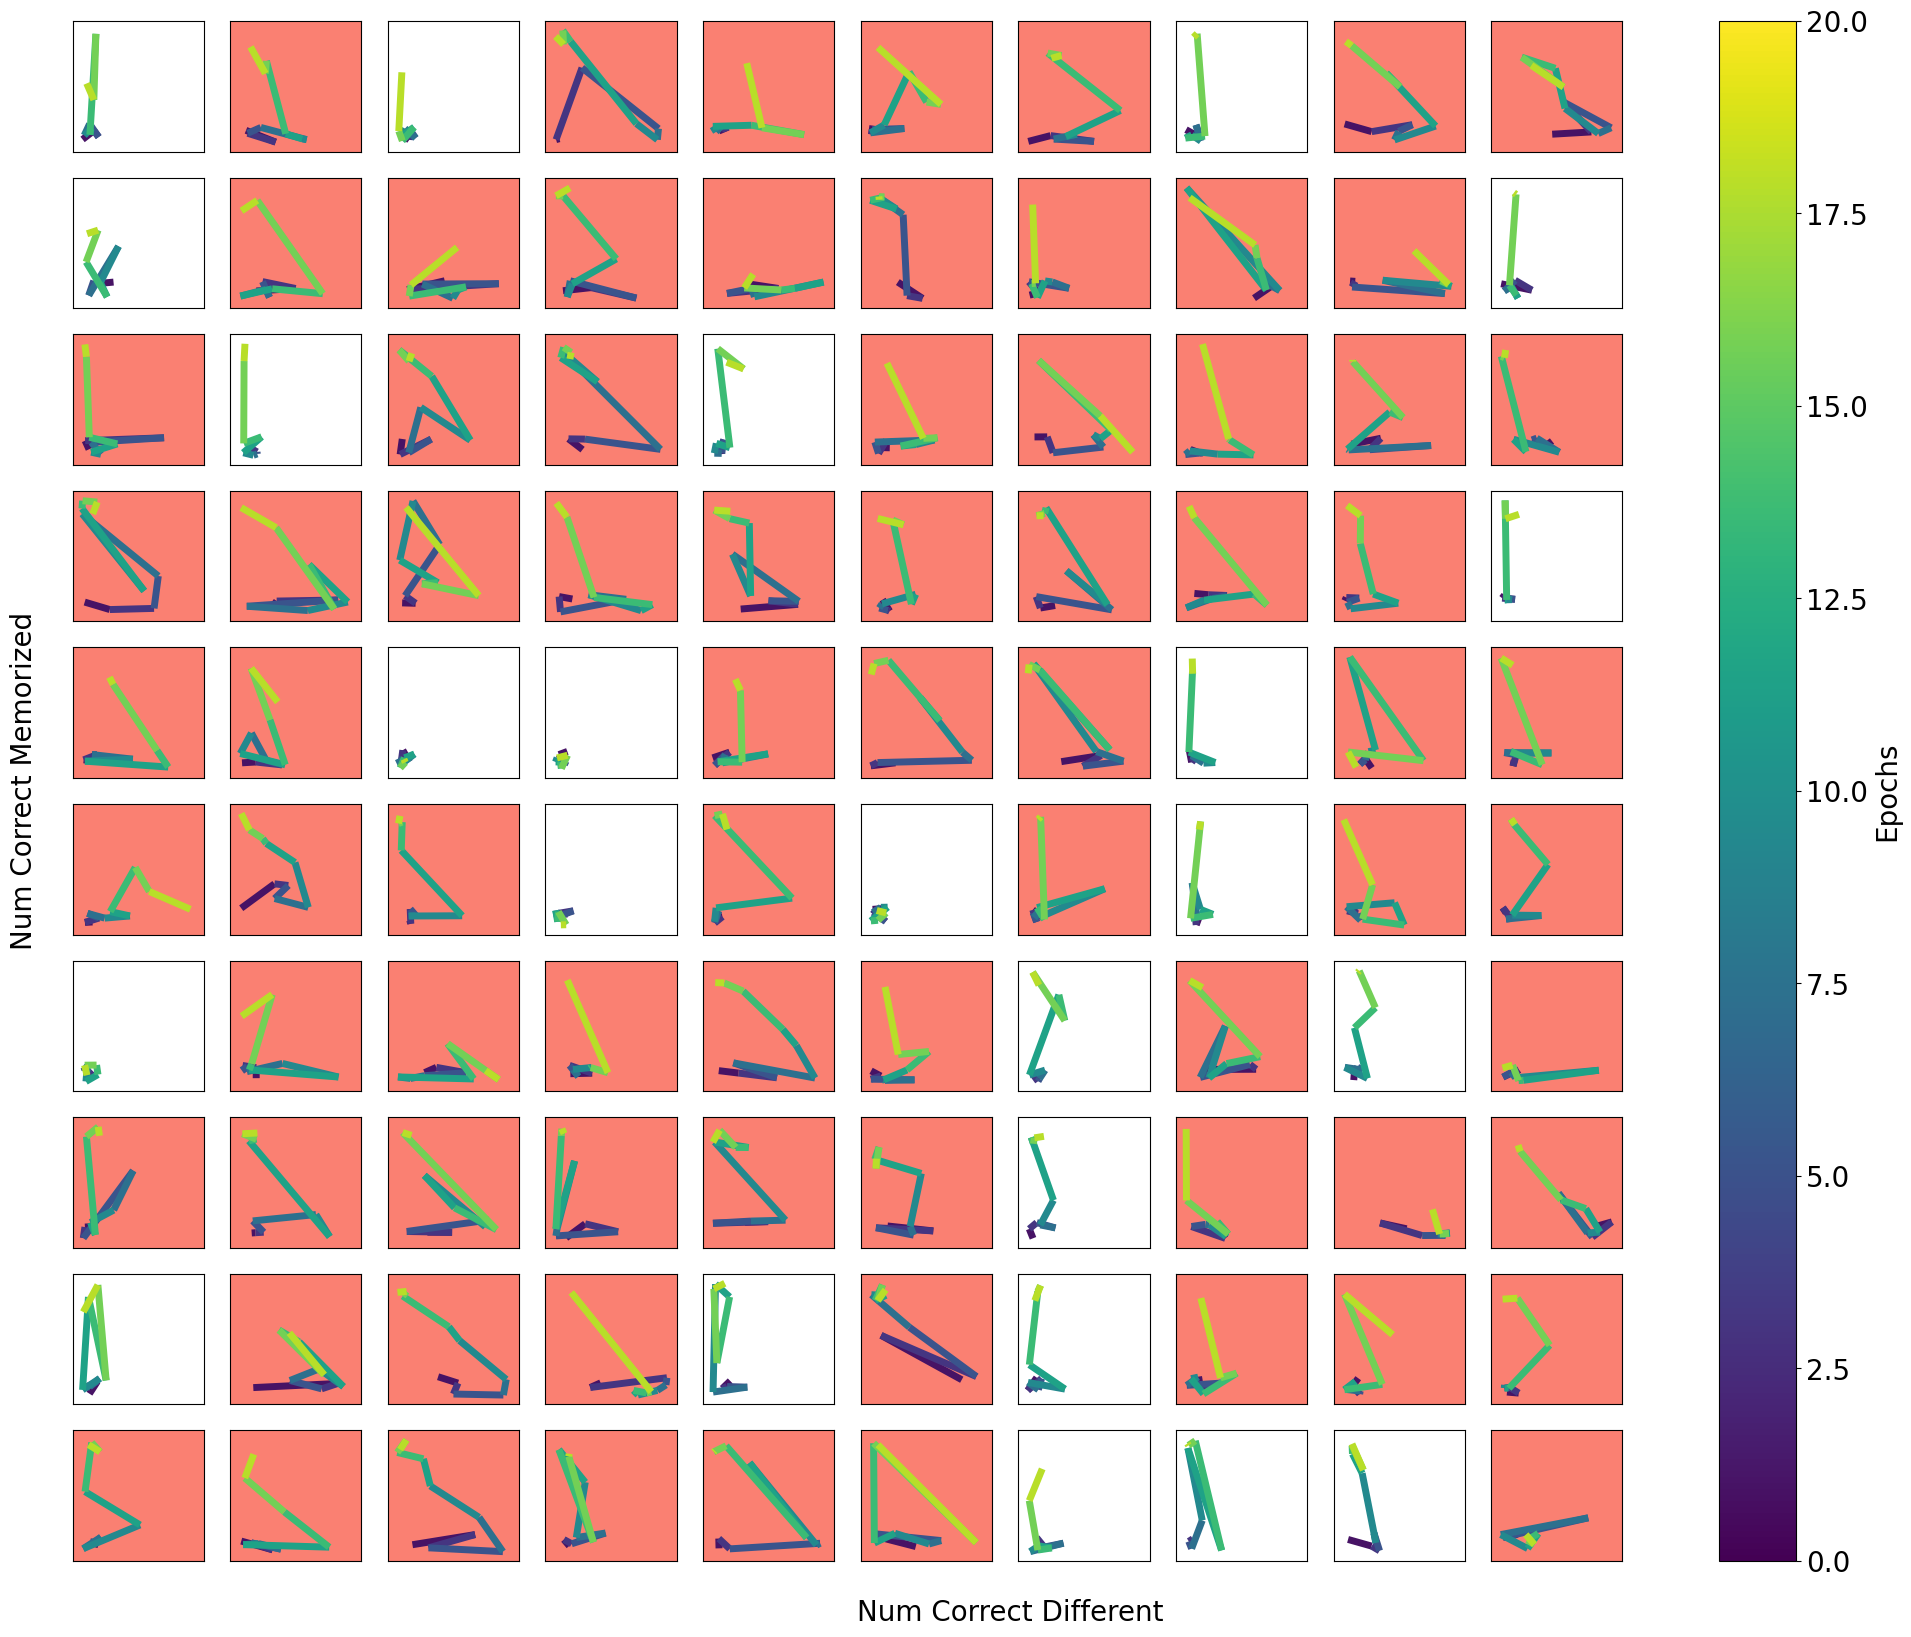

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, 10)




for i in range(100):
    x = num_correct_different_all[:, i]+np.random.uniform(-0.5, 0.5, 10)
    y = num_memorized_all[:, i]+np.random.uniform(-0.5, 0.5, 10)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

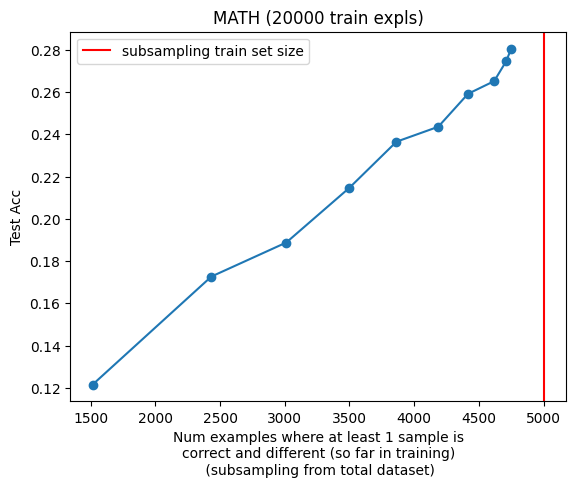

In [14]:
cummulative_num_correct_different = []
for i in range(10):
    cummulative_num_correct_different.append((num_correct_different_all[:i+1].max(axis=0)>=1).sum())
    # cummulative_num_correct_different.append(num_correct_different_all[:i+1].sum())


plt.plot(cummulative_num_correct_different, test_accs_all, "o-")
plt.axvline(5000, color = "red", label = "subsampling train set size")
plt.legend()

# plt.plot([417, 1424, 2263, 2852, 3204, 3329, 3360], [0.1282 , 0.13368, 0.14536, 0.1474 , 0.14704, 0.1598 , 0.16456], "o-")

plt.xlabel("Num examples where at least 1 sample is\ncorrect and different (so far in training)\n (subsampling from total dataset)")
plt.ylabel("Test Acc")
plt.title("MATH (20000 train expls)")
plt.savefig("delete.png")

In [11]:
len(num_correct_different_all[0])

5000

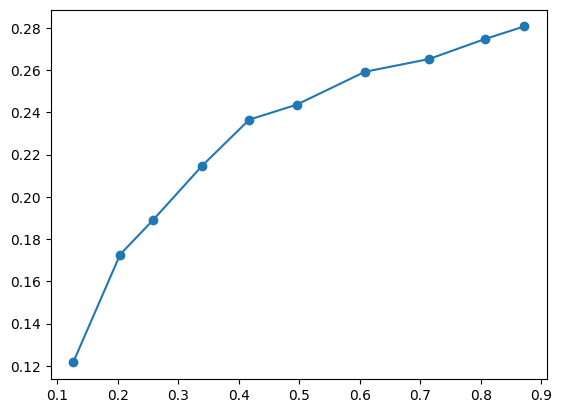

In [61]:
plt.plot(1-(num_incorrect_all/5).mean(axis=1), test_accs_all, "o-")
plt.savefig("delete.png")

In [29]:
test_accs_all = []
ckpts = ["3332", "4998", "6664", "8330", "9996", "11662", "13328"]
for ckpt in ckpts:
    test_accs = (np.load("ckpts/math_aug3_unmemorized_total20000_epochs20/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all.append(test_accs.mean())

test_accs_all = np.array(test_accs_all)

0.1282
0.13368
0.14536
0.1474
0.14704
0.1598
0.16456


In [4]:
subsample_idxs = np.load("ckpts/math_aug3_unmemorized_total20000_epochs20/subsample_idxs.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'ckpts/math_aug3_unmemorized_total20000_epochs20/subsample_idxs.npy'

In [31]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

ckpts = ["3332", "4998", "6664", "8330", "9996", "11662", "13328"]

for ckpt in ckpts:
    train_correct = (np.load("ckpts/math_aug3_unmemorized_total20000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/math_aug3_unmemorized_total20000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

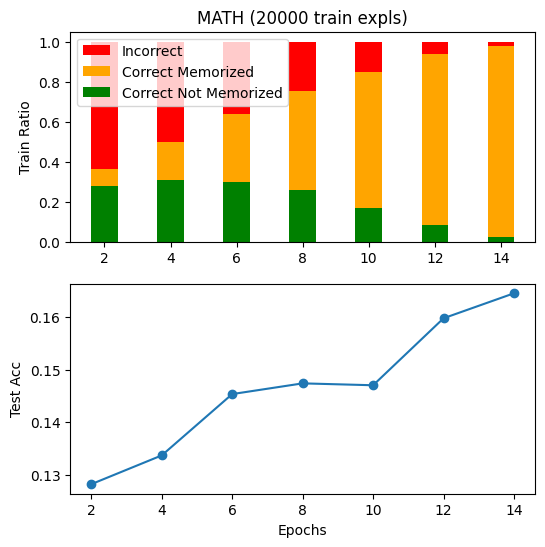

In [33]:
# make 2 subplots
num_ckpts = 7
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.bar([2*i for i in range(1, num_ckpts+1)], [1 for i in range(num_ckpts)], color = "red", label = "Incorrect")
ax1.bar([2*i for i in range(1, num_ckpts+1)], [1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized")
ax1.bar([2*i for i in range(1, num_ckpts+1)], [1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized")
ax1.set_xticks([2*i for i in range(1, num_ckpts+1)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (20000 train expls)")
ax1.legend()

ax2.plot([2*i for i in range(1, num_ckpts+1)], test_accs_all, "o-")
ax2.set_xticks([2*i for i in range(1, num_ckpts+1)])
ax2.set_ylabel("Test Acc")
ax2.set_xlabel("Epochs")
plt.savefig("delete.png")

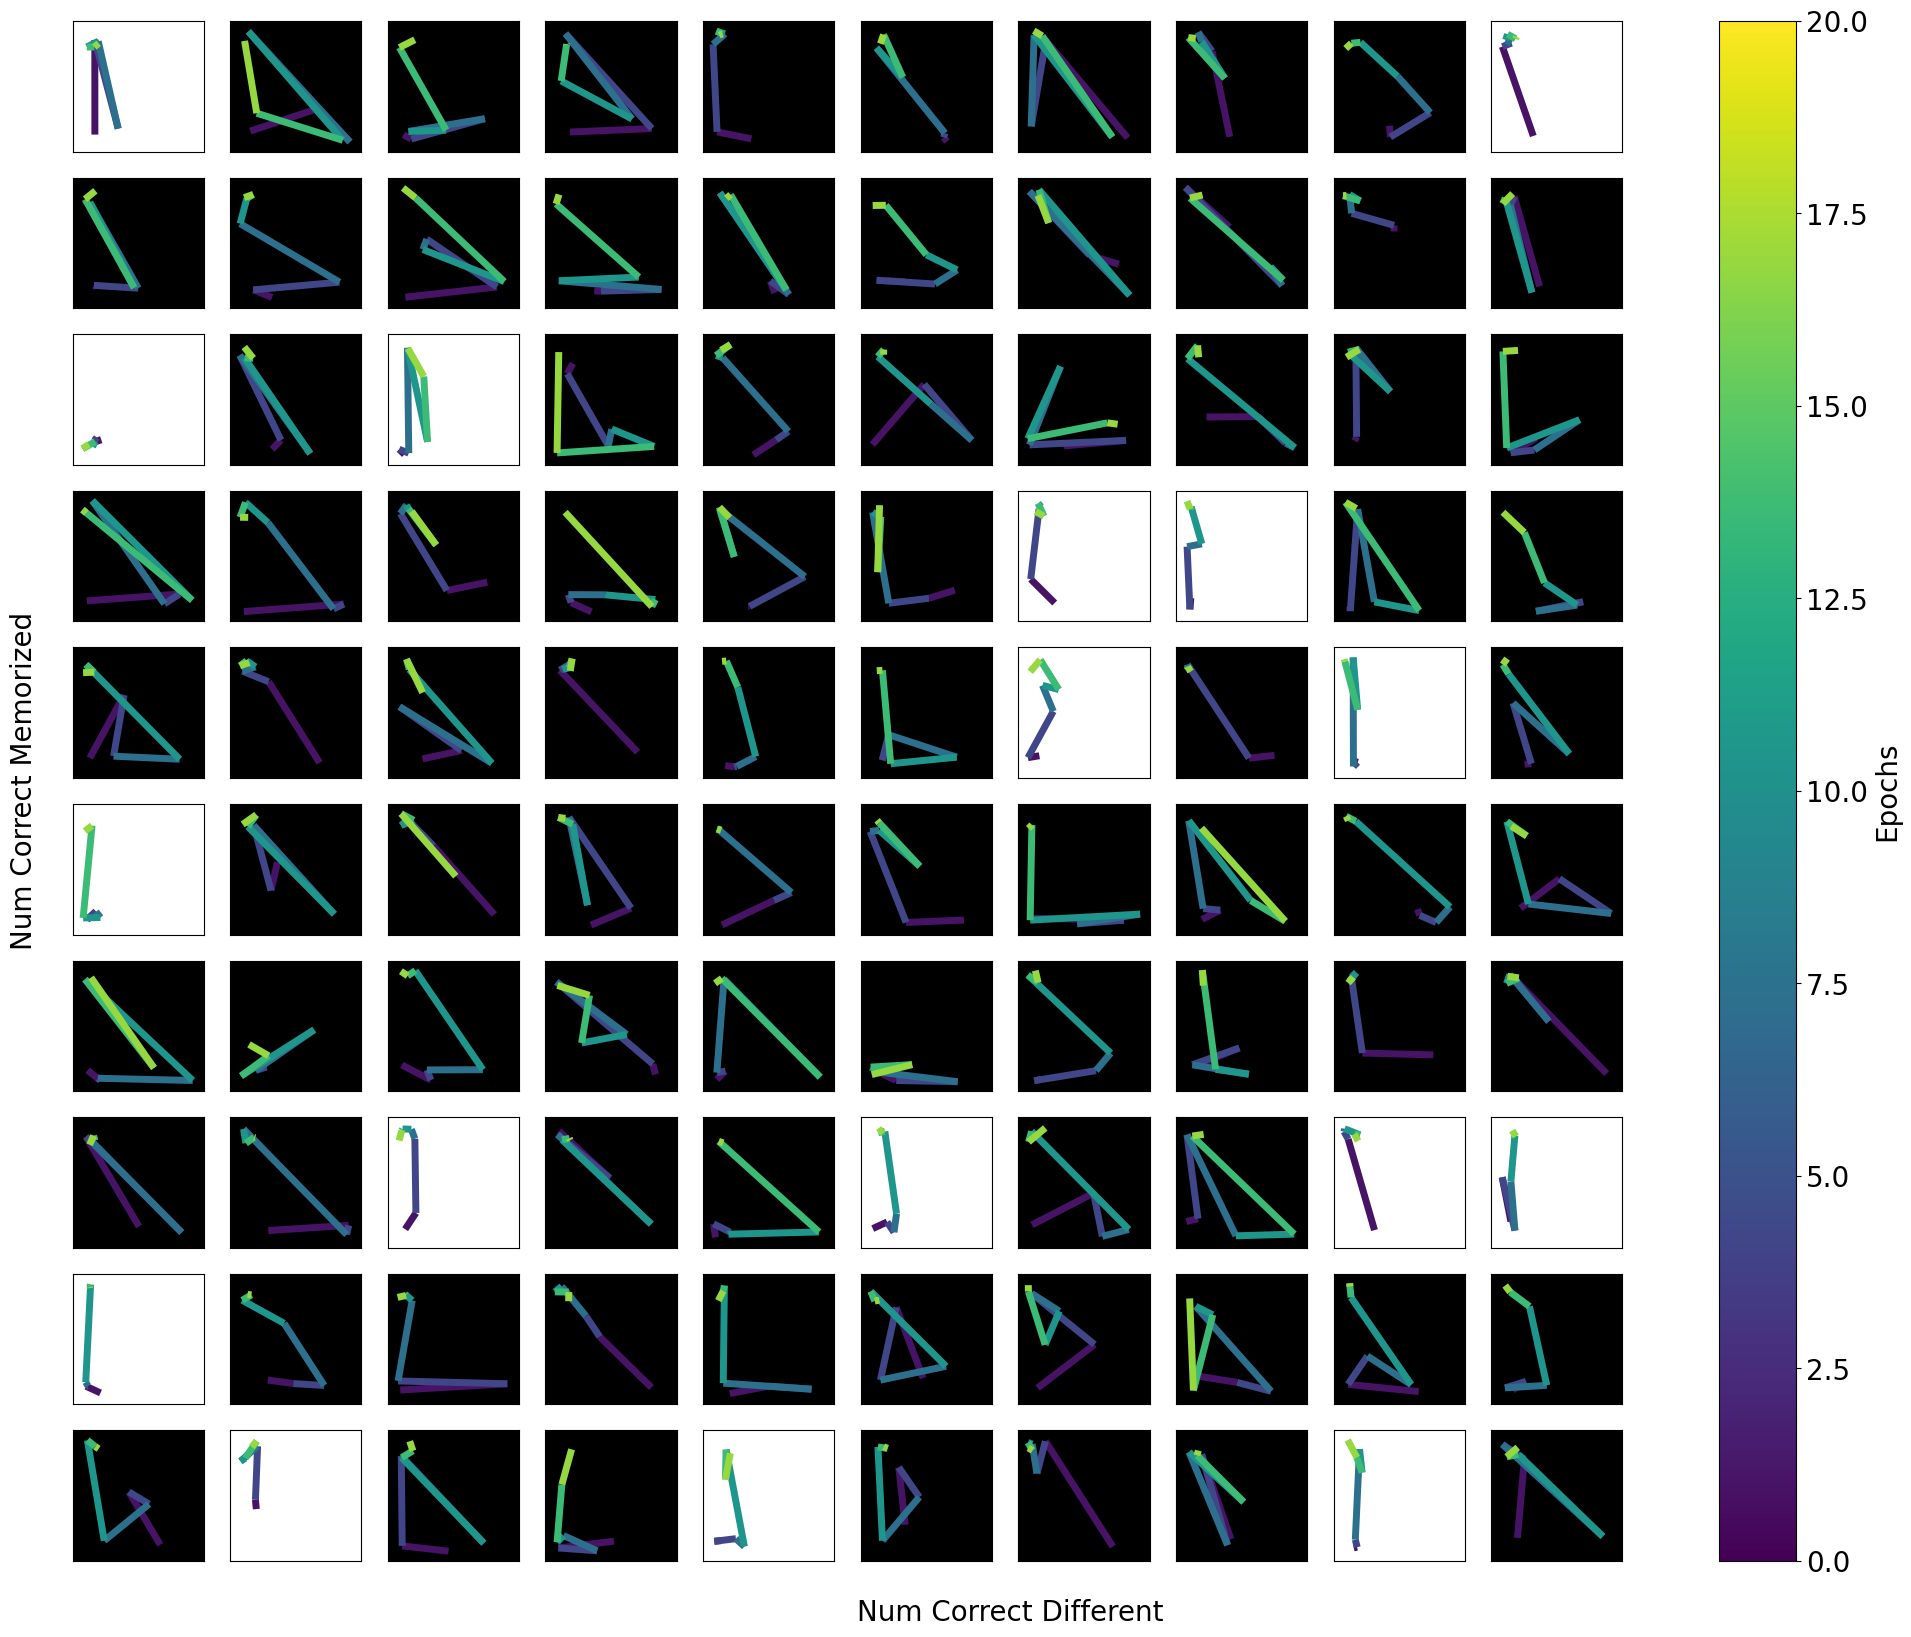

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, num_ckpts)




for i in range(100):
    x = num_correct_different_all[:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    y = num_memorized_all[:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('black')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

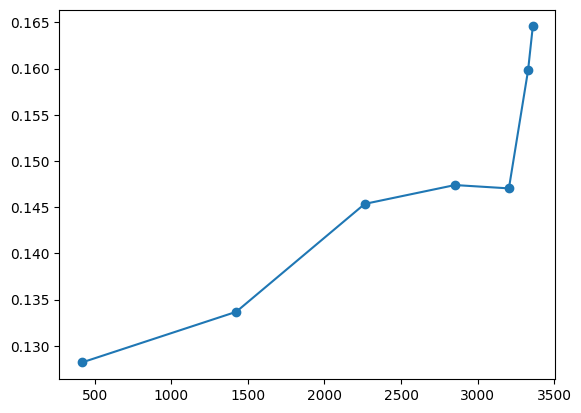

In [38]:
cummulative_num_correct_different = []
for i in range(num_ckpts):
    cummulative_num_correct_different.append((num_correct_different_all[:i+1].sum(axis=0)>=5).sum())
    # cummulative_num_correct_different.append(num_correct_different_all[:i+1].sum())


plt.plot(cummulative_num_correct_different, test_accs_all, "o-")

plt.savefig("delete.png")

In [39]:
cummulative_num_correct_different

[417, 1424, 2263, 2852, 3204, 3329, 3360]

In [40]:
test_accs_all

array([0.1282 , 0.13368, 0.14536, 0.1474 , 0.14704, 0.1598 , 0.16456])